### Efficient Frontier - Part 3: Running the Optimizer
In order to plot the frontier for portfolios with more than 2 assets, we need to find the weights of the portfolio on the Efficient Frontier.

We start by creating the same sort of function that we already created for the 2 asset case:

``` Python
def plot_ef(er, cov, n_points):
    """
    Plots the multi-asset Efficient Frontier
    """
    weights == ?? # we need to implement: optimal_weights(n_points, er, cov)

    rets = [portfoloio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "R": rets,
        "V": vols,
    })
    return ef.plot.line(x = "V", y = "R", style = ".-")
```

In [2]:
# Let's start by loading up the data as usual:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import portfolio_management_lib as port

ind = port.get_ind_returns()
ind_annualized_rets = port.annualize_rets(ind["1996": "2000"], "Monthly")
cov = ind["1996": "2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/joe/Study/portfolio_management_prac/lib/portfolio_management_lib.py:215: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


in order to find the optimal weights, we need a function that will minimize the volatility for a given level of return.
``` Python
def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix.
    """
    n: int = er.shape[0] # How many assets do we have?
    init_guess = np.repeat(1/n, n) # sample weights where each asset have the same weight in the portfolio
```

Let's use this to recreate the result we got from frontier for the 2-Asset optimization between "Games" and "Fin". Let's plot that efficient frontier as we did last time.

<Axes: xlabel='V'>

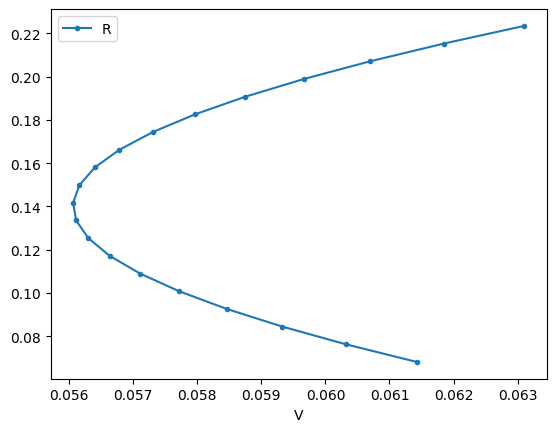

In [16]:
l = ["Games", "Fin"]
port.plot_ef2(
    ind_annualized_rets[l],
    cov.loc[l, l],
    n_points = 20
)

The Efficient Frontier for the portfolio that has a target return of 0.15 is approx 0.056, so let's see if our optimizer is able to locate it.

In [29]:
weights_15 = port.minimize_vol(0.15, ind_annualized_rets[l], cov.loc[l, l])
vol_15 = port.portfolio_vol(weights_15, cov.loc[l, l])
vol_15

np.float64(0.056163669406706564)

We got the volatility value as expected.

Now that we can find the wegiths to minimize the vol given a target return, we can plot the efficient frontier by dividing up the range from the highest to the lowest possible return into a grid, and finding the portfolio that targets the minimize volatility given a particular targeted rate of return.

Add these:
``` Python
def optimal_weights(
    expected_return,
    cov,
    n_points = 20,
):
    """
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights
```

```Python
def plot_ef(
    expected_return,
    cov,
    n_points = 20,
):
    """
    Plots the ulti-asset efficient frontier
    """
    weights = optimal_wegiths(n_points, er, cov) # not yet implemented
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "R": rets,
        "V": vols,
    })
    return ef.plot.line(x = "V", y = "R", style = ".-")

```


[0.06821155 0.07528252 0.08235348 0.08942445 0.09649542 0.10356639
 0.11063736 0.11770832 0.12477929 0.13185026 0.13892123 0.1459922
 0.15306316 0.16013413 0.1672051  0.17427607 0.18134704 0.18841801
 0.19548897 0.20255994 0.20963091 0.21670188 0.22377285 0.23084381
 0.23791478 0.24498575 0.25205672 0.25912769 0.26619865 0.27326962
 0.28034059 0.28741156 0.29448253 0.30155349 0.30862446 0.31569543
 0.3227664  0.32983737 0.33690833 0.3439793  0.35105027 0.35812124
 0.36519221 0.37226317 0.37933414 0.38640511 0.39347608 0.40054705
 0.40761801 0.41468898]


<Axes: xlabel='V'>

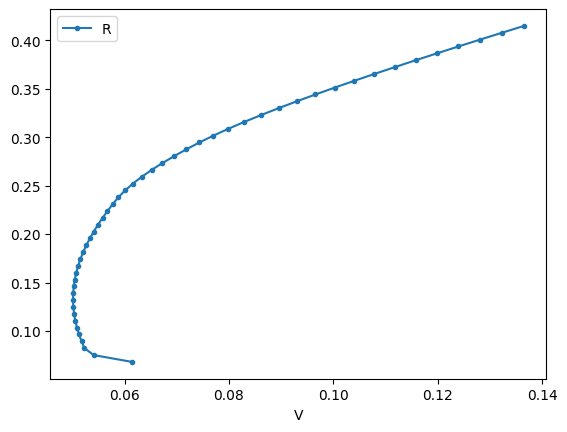

In [40]:
l = ["Smoke", "Fin", "Games", "Coal"]
port.plot_ef(ind_annualized_rets[l], cov.loc[l, l], n_points = 50)

##### Testing for the 2-Assets Case using the existing function

<Axes: xlabel='V'>

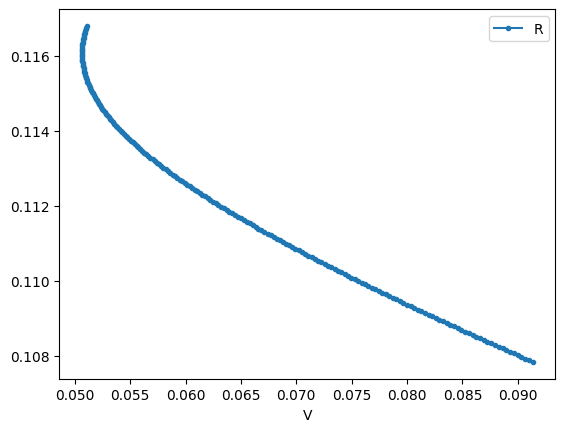

In [46]:
l = ["Food", "Smoke"]

port.plot_ef2(
    ind_annualized_rets[l],
    cov.loc[l, l],
    n_points = 200,
)

<Axes: xlabel='V'>

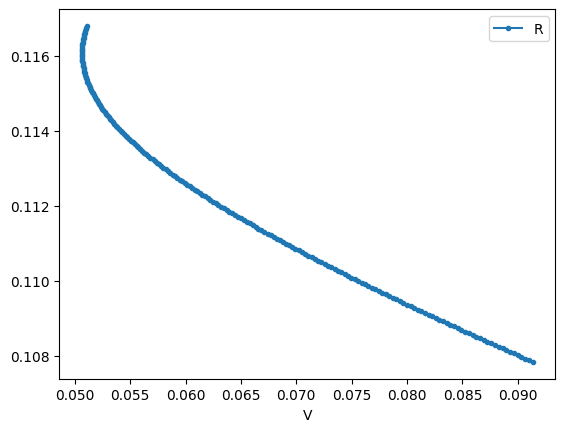

In [47]:
port.plot_ef(
    ind_annualized_rets[l],
    cov.loc[l, l],
    n_points = 200
)